# Mosquitoes detection demo

In [1]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../codes/maskrcnn-benchmark/')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [4]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [5]:
from maskrcnn_benchmark.config import cfg
from demo.predictor import COCODemo

In [6]:
!pwd

/home/wesley.passos/repos/mosquitoes-wes/notebooks


In [7]:
config_file = '../codes/maskrcnn-benchmark/configs/mosquitoes/e2e_faster_rcnn_R_50_C4_1x_cocostyle.yaml'

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.merge_from_list(["DATALOADER.SIZE_DIVISIBILITY", 32])
cfg.merge_from_list(["MODEL.WEIGHT", 
                      "../codes/maskrcnn-benchmark/results/e2e_faster_rcnn_R_50_C4_1x_cocostyle/model_final.pth"])

In [8]:
mosquitoes_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.5,
)

In [9]:
def load_image(path):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def load_url(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

(1080, 1920, 3)


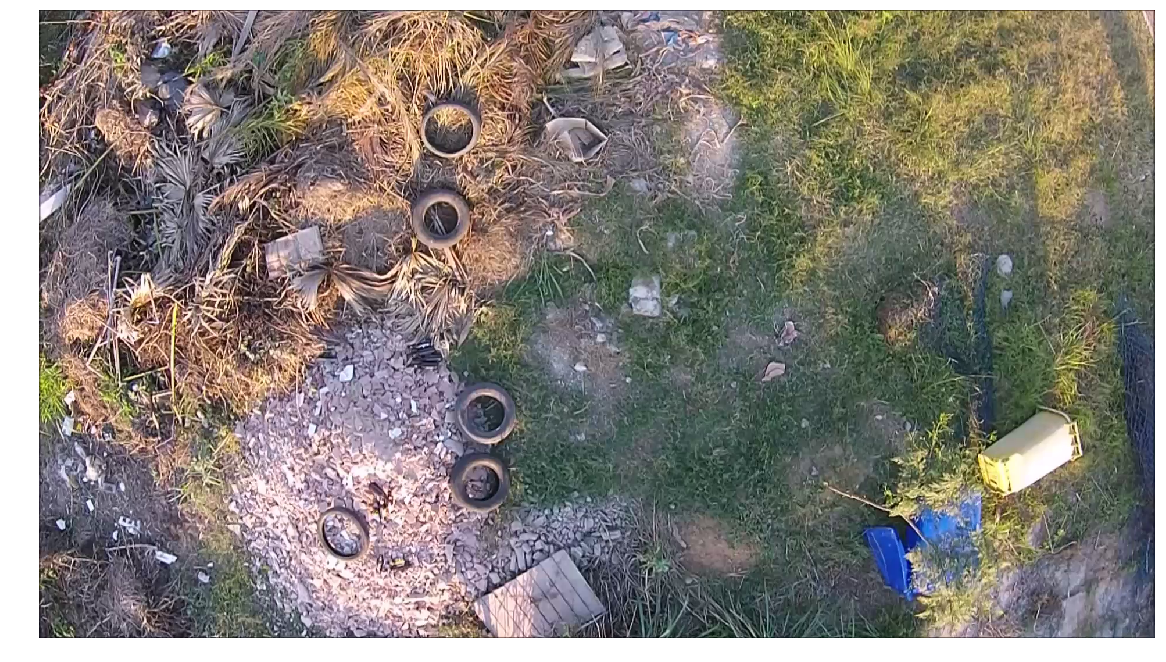

In [10]:
img = load_image('../data/CEFET/VideoDataSet/5m/Test/DJI00806_5m_01aTomada/frame_0180.png')
imshow(img)
print(img.shape)

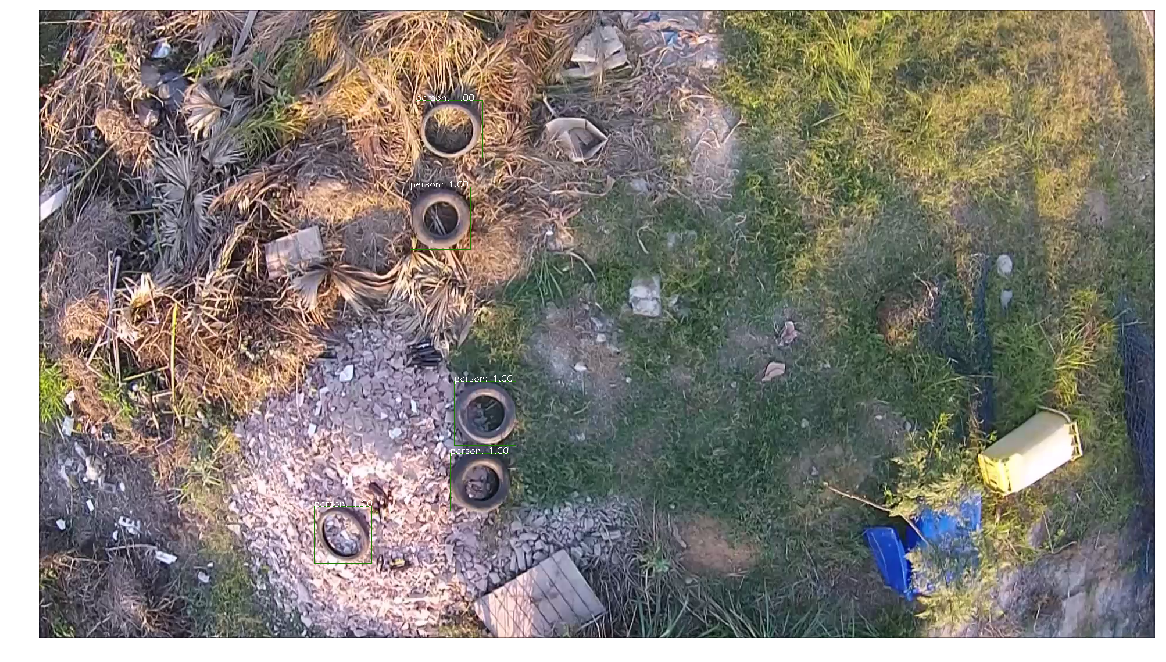

In [11]:
# compute predictions
predictions = mosquitoes_demo.run_on_opencv_image(img)
imshow(predictions)

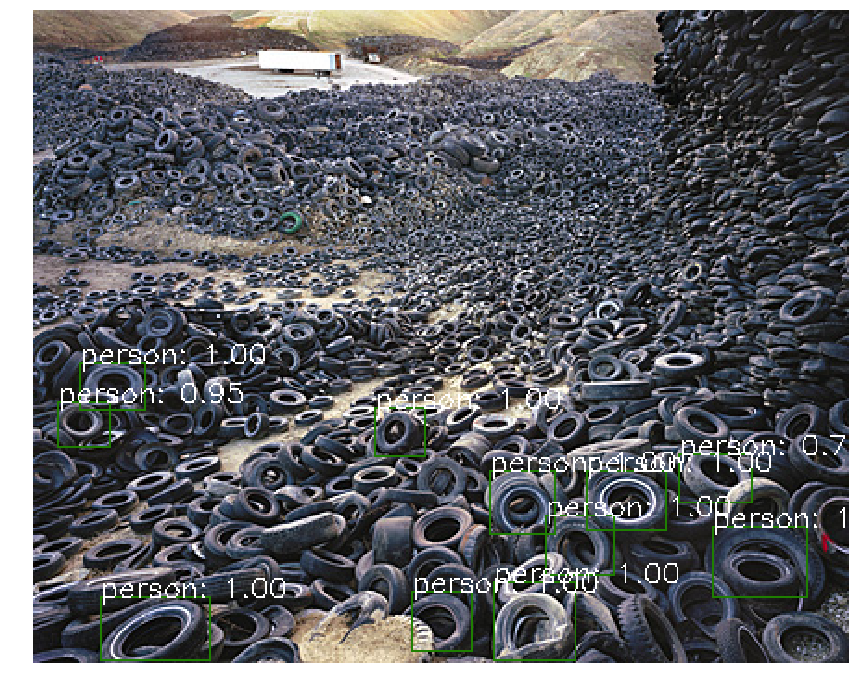

In [12]:
image = load_url("https://isiria.files.wordpress.com/2009/03/oxford_tire_pile_011.jpg")
imshow(image)
# compute predictions
predictions = mosquitoes_demo.run_on_opencv_image(image)
imshow(predictions)

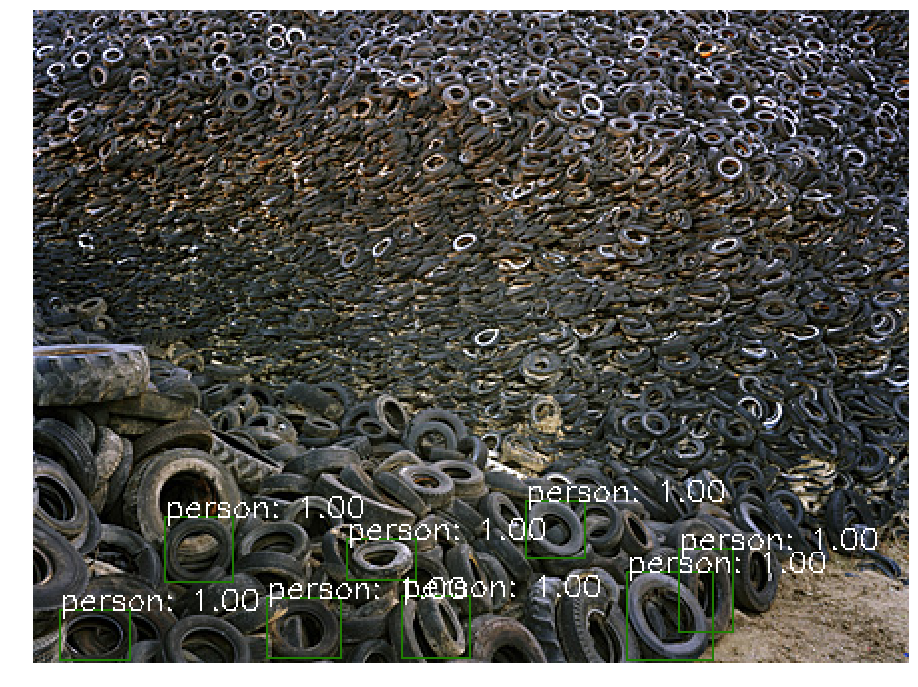

In [13]:
image = load_url("https://thesocietypages.org/socimages/files/2008/12/oxford_tire_pile_09a.jpg")
imshow(image)
# compute predictions
predictions = mosquitoes_demo.run_on_opencv_image(image)
imshow(predictions)

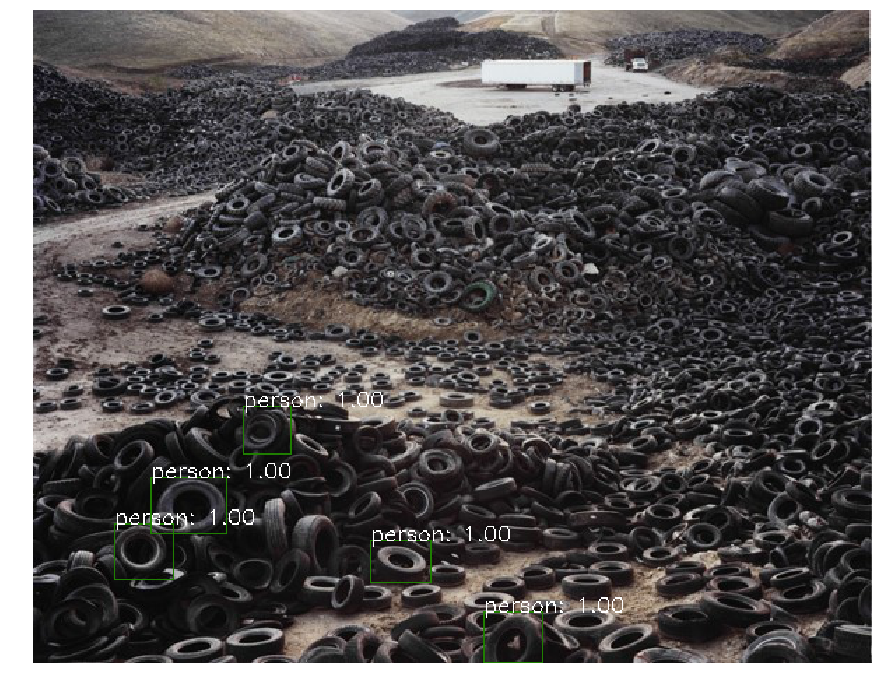

In [14]:
image = load_url("https://www.dailyserving.com/wp-content/uploads/2015/07/Fig.-1-Edward-Burtynsky-600x467.jpg")
imshow(image)
# compute predictions
predictions = mosquitoes_demo.run_on_opencv_image(image)
imshow(predictions)